In [166]:
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
from matplotlib.pyplot import imshow
import numpy as np
import pandas as pd
import os
import cv2
import sys
import argparse
from PIL import Image, ImageDraw, ImageFont
from io import BytesIO
from keras.models import load_model
import json
import pprint
import cv2
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from keras import layers, Input, models, optimizers
from keras.models import Model, Sequential
from keras.layers import MaxPooling2D, Conv2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [78]:
API_URL = 'https://kapi.kakao.com/v1/vision/product/detect'
MYAPP_KEY = '89b7d96fc38f45fbf6ca52c2b13d2ad8'

url = "https://kapi.kakao.com/v1/vision/product/detect"       
headers = {'Authorization': 'KakaoAK {}'.format(MYAPP_KEY)}

## 카카오 API 사용해서 이미지 label 달아보기

In [180]:
img_dir ='C:/Jupyter_Script/img/test/test (100).jpg'

In [228]:
# 카카오 API 활용해서 사진 정보 받아오기 (1) : 사진크기


filename = img_dir                                              # 이미지 주소
files = { 'file' : open(filename, 'rb')}

response = requests.post(url, headers=headers, files=files)

result = response.json()
fig_w, fig_h = result['result']['width'], result['result']['height']
print(fig_w, fig_h)


683 1024


[{'x1': 0.604953, 'y1': 0.326258, 'x2': 0.893868, 'y2': 0.495283, 'class': 't-shirts'}, {'x1': 0.557783, 'y1': 0.481918, 'x2': 0.79717, 'y2': 0.858491, 'class': 'pants'}, {'x1': 0.608491, 'y1': 0.841981, 'x2': 0.712264, 'y2': 0.91195, 'class': 'sandals'}, {'x1': 0.696934, 'y1': 0.805031, 'x2': 0.777123, 'y2': 0.909591, 'class': 'sandals'}, {'x1': 0.601415, 'y1': 0.5, 'x2': 0.643868, 'y2': 0.522799, 'class': 'watch'}]


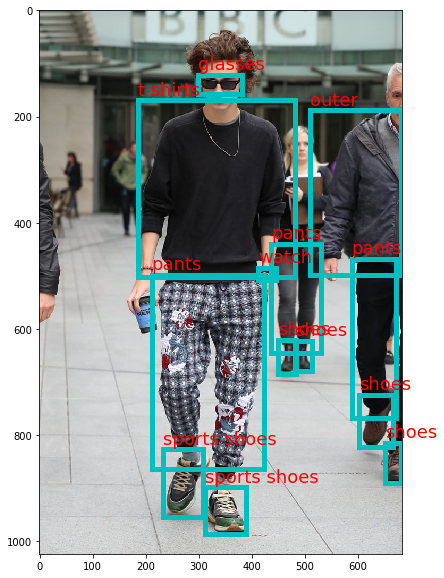

In [229]:
img = mpimg.imread(img_dir)              # 이미지 주소
fig,ax = plt.subplots(figsize=(10,10))


for each in result['result']['objects']:

    x, y = each['x1']*fig_w, each['y1']*fig_h
    w, h = each['x2']*fig_w - x, each['y2']*fig_h - y
    
    rect = patches.Rectangle((x, y), w, h, lw=5, edgecolor='c', facecolor='none')
    ax.add_patch(rect)
    plt.text(x,y-10, each['class'], size=18, color='red')
       
    
print(info)
ax.imshow(img)
plt.show()

## 이미지 자르기

In [227]:
img_dir ='C:/Jupyter_Script/img/test/test (103).jpg'

[{'x1': 0.270864, 'y1': 0.165039, 'x2': 0.70571, 'y2': 0.491211, 'class': 't-shirts'}]
[{'x1': 0.270864, 'y1': 0.165039, 'x2': 0.70571, 'y2': 0.491211, 'class': 't-shirts'}, {'x1': 0.308931, 'y1': 0.486328, 'x2': 0.619327, 'y2': 0.842773, 'class': 'pants'}]
[{'x1': 0.270864, 'y1': 0.165039, 'x2': 0.70571, 'y2': 0.491211, 'class': 't-shirts'}, {'x1': 0.308931, 'y1': 0.486328, 'x2': 0.619327, 'y2': 0.842773, 'class': 'pants'}, {'x1': 0.63836, 'y1': 0.429688, 'x2': 0.777452, 'y2': 0.629883, 'class': 'pants'}]
[{'x1': 0.270864, 'y1': 0.165039, 'x2': 0.70571, 'y2': 0.491211, 'class': 't-shirts'}, {'x1': 0.308931, 'y1': 0.486328, 'x2': 0.619327, 'y2': 0.842773, 'class': 'pants'}, {'x1': 0.63836, 'y1': 0.429688, 'x2': 0.777452, 'y2': 0.629883, 'class': 'pants'}, {'x1': 0.860908, 'y1': 0.457031, 'x2': 0.983895, 'y2': 0.75, 'class': 'pants'}]
[{'x1': 0.270864, 'y1': 0.165039, 'x2': 0.70571, 'y2': 0.491211, 'class': 't-shirts'}, {'x1': 0.308931, 'y1': 0.486328, 'x2': 0.619327, 'y2': 0.842773, 'c

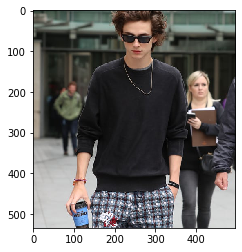

In [231]:
API_URL = 'https://kapi.kakao.com/v1/vision/product/detect'
MYAPP_KEY = '89b7d96fc38f45fbf6ca52c2b13d2ad8'

url = "https://kapi.kakao.com/v1/vision/product/detect"       
headers = {'Authorization': 'KakaoAK {}'.format(MYAPP_KEY)}



files = { 'file' : open(img_dir, 'rb')}
response = requests.post(url, headers=headers, files=files)
result = response.json()
fig_w, fig_h = result['result']['width'], result['result']['height']
    
img = Image.open(img_dir)
#img = mpimg.imread(img_dir)       

info = []
for each in result['result']['objects']:
    info.append(each)
    print(info)
    
for _ in range(len(info)):
        
    if info[_]['class'] == 't-shirts':             # 다른 속성도 넣으면 이상해짐,, skirt, shirts

        x = info[_]['x1']*fig_w - 100
        y = info[_]['y1']*fig_h - 100
        w = info[_]['x2']*fig_w + 100
        h = info[_]['y2']*fig_h + 100
        
        img = img.crop((x,y,w,h))
        plt.imshow(img)


## 이미지 분리 및 속성 알려주는 함수 생성

In [222]:
img_dir ='C:/Jupyter_Script/img/test/test (103).jpg'

In [223]:
# 이미지 분리 및 속성 알려주는 함수 생성


def seperate_n_predict(img_dir):
    
    #model_dir = os.path.join( 'C:/Jupyter_Script/파이널프로젝트/model' + model_name)   # 불러올 모델 이름
    
    model = load_model('C:/Jupyter_Script/파이널프로젝트/model/model_pattern_final.h5') 
    model_json = model.to_json()
    
    files = { 'file' : open(img_dir, 'rb')}
    response = requests.post(url, headers=headers, files=files)
    result = response.json()
    fig_w, fig_h = result['result']['width'], result['result']['height']
    
    img = Image.open(img_dir)
#    img = mpimg.imread(img_dir)       

    info = []
    for each in result['result']['objects']:
        info.append(each)
    print(info)
    
    for _ in range(len(info)):
        
#        if info[_]['class'] == 't-shirts' or 'shirts' or 'pants' or 'skirt':     # 안걸러잠...

        x = info[_]['x1']*fig_w - 100   # 여분을 두고 crop 하기 위해서
        y = info[_]['y1']*fig_h - 100
        w = info[_]['x2']*fig_w + 100
        h = info[_]['y2']*fig_h + 100

        img = img.crop((x,y,w,h))
        img = img.resize((150,150))
        data = np.array(img)
        data = data.astype('float')
        data = data/255
        data = data.reshape((1,150,150,3))

        var = ['camo', 'check', 'dot', 'floral', 'graphic', 'lace', 'leopard', 'none', 'stripe']
        result = var[model.predict_classes(data)[0]]
        k = info[_]['class']
        print(f'옷 : {k}')
        print(f'패턴 : {result}')
            
          
# print(info)
# print(len(info))
# # plt.show()

In [224]:
# 함수로 한번 실행해보자

seperate_n_predict(img_dir)

[{'x1': 0.604953, 'y1': 0.326258, 'x2': 0.893868, 'y2': 0.495283, 'class': 't-shirts'}, {'x1': 0.557783, 'y1': 0.481918, 'x2': 0.79717, 'y2': 0.858491, 'class': 'pants'}, {'x1': 0.608491, 'y1': 0.841981, 'x2': 0.712264, 'y2': 0.91195, 'class': 'sandals'}, {'x1': 0.696934, 'y1': 0.805031, 'x2': 0.777123, 'y2': 0.909591, 'class': 'sandals'}, {'x1': 0.601415, 'y1': 0.5, 'x2': 0.643868, 'y2': 0.522799, 'class': 'watch'}]
옷 : t-shirts
패턴 : lace
옷 : pants
패턴 : lace
옷 : sandals
패턴 : lace
옷 : sandals
패턴 : lace
옷 : watch
패턴 : lace


## 모델로 예측해서 비교해보기

0
--이 사진의 pattern 값--
camo


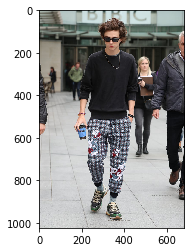

In [226]:
from keras.models import load_model
import json
import pprint

model = load_model('C:/Jupyter_script/파이널프로젝트/model/model_pattern_final.h5') # 불러올 모델 이름
model_json = model.to_json()
#pprint.pprint(json.loads(model_json))


img = Image.open('C:/Jupyter_script/img/test/test (103).jpg')                      # 불러올 이미지 경로
plt.imshow(img)

img = img.resize((150,150))
data = np.array(img)
data = data.astype('float')
data = data/255
data = data.reshape((1,150,150,3))


#result = np.argmax(data)
var = ['camo', 'check', 'dot', 'floral', 'graphic', 'lace', 'leopard', 'none', 'stripe']
#var = list(training_set.class_indices.keys())   # y에 해당되는 값
#print(var)

result = model.predict_classes(data)[0]
print(result)

print('--이 사진의 pattern 값--')
print(var[result])

